# 02 - Modeling and Evaluation
### Email Marketing and Campaign Analytics

This notebook trains baseline and advanced models to predict:
- Email open probability
- Downstream engagement

We will evaluate:
- Precision, Recall, F1
- ROC-AUC
- Lift (marketing effectiveness)

And preparte the model for streamlit

In [1]:
import sys
from pathlib import Path

PROJECT_ROOT = Path().resolve().parent
sys.path.append(str(PROJECT_ROOT / "src"))

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from preprocess import preprocess_raw_data
from features import prepare_data
from modeling import train_and_evaluate

In [2]:
df_clean = preprocess_raw_data(save_interim=False)
df_clean.head()

[2025-12-11 04:42:41] [preprocess] [INFO] >>> Starting preprocessing pipeline
[2025-12-11 04:42:42] [preprocess] [INFO] Loaded dataset. Shape: (400000, 30)
C:\Users\aakas\email-marketing-campaign-analytics\src\preprocess.py:26: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df["mailing_date"] = pd.to_datetime(
[2025-12-11 04:42:42] [preprocess] [INFO] Final preprocessed shape: (400000, 36)


,id,first_name,last_name,email,country,region,gender,age,household_status,presence_children,...,open_flag,click_flag,conversion_flag,unsubscribe_flag,mailing_year,mailing_month,mailing_day,mailing_day_of_week,engagement_score,is_weekend
0,1,Vivan,Vasiliev,vivan.vasiliev2127@example.com,Brazil,South America,M,65,H,N,...,0,0,0,0,2024,4,15,0,0.846357,0
1,2,Harper,Aslam,harper.aslam3997@example.com,Japan,Asia,M,55,P,Y,...,0,0,0,0,2024,7,24,2,0.346411,0
2,3,Halfdan,Holding,halfdan.holding4223@example.com,India,Asia,M,29,H,Y,...,1,0,0,0,2024,4,23,1,0.566931,0
3,4,Sam,Eastwood,sam.eastwood8903@example.com,Switzerland,Europe,F,59,U,N,...,1,0,0,0,2024,12,27,4,0.744582,0
4,5,Christina,Sheeran,christina.sheeran622@example.com,Turkey,Middle East,M,20,P,N,...,0,0,0,0,2024,3,6,2,0.633633,0


In [3]:
X_train, X_test, y_train, y_test, preprocessor, feature_names = prepare_data(df_clean, target_col= "open_flag")
X_train.shape, X_test.shape

[2025-12-11 04:42:42] [features] [INFO] Preparing model data with target: {target_col}
[2025-12-11 04:42:42] [features] [INFO] Train shape: (320000, 35), Test shape : (80000, 35)
[2025-12-11 04:42:42] [features] [INFO] Numeric features: ['age', 'num_adults', 'num_children', 'previous_open_rate', 'previous_click_rate', 'previous_purchases', 'engagement_score', 'mailing_hour', 'mailing_year', 'mailing_month', 'mailing_day', 'mailing_day_of_week', 'is_weekend']
[2025-12-11 04:42:42] [features] [INFO] One-hot features: ['gender', 'presence_children', 'owns_home', 'probable_renter', 'device_type', 'mailing_category', 'consumer_archetypes', 'mosaic_segment', 'income_range', 'household_status', 'marital_status']
[2025-12-11 04:42:42] [features] [INFO] Ordinal features: ['country', 'region', 'language']
[2025-12-11 04:42:44] [features] [INFO] Total transformed feature dimension: 54


((320000, 54), (80000, 54))

In [4]:
logreg_model, logreg_metrics = train_and_evaluate(
    "logreg", X_train, y_train, X_test, y_test)
logreg_metrics

[2025-12-11 04:42:44] [modeling] [INFO] Running training pipeline for model: logreg
[2025-12-11 04:42:44] [modeling] [INFO] ---Training Logistic Regression Model
d:\ProgramData\miniforge3\envs\py39\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[2025-12-11 04:43:19] [modeling] [INFO] Model evaluation: {'ROC_AUC': np.float64(0.7192911889998908), 'Precision': 0.49894857579812657, 'Recall': 0.12929112795363354, 'F1': 0.20536627586749548, 'ConfusionMatrix': [[57192, 2621], [17577, 2610]]}
[2025-12-11 04:43:19] [modeling] [INFO] Training and evaluation pipe

{'ROC_AUC': np.float64(0.7192911889998908),
 'Precision': 0.49894857579812657,
 'Recall': 0.12929112795363354,
 'F1': 0.20536627586749548,
 'ConfusionMatrix': [[57192, 2621], [17577, 2610]],
 'lift':         total  positives  response_rate  cumulative_positives      lift
 decile                                                                 
 9        8000       3866       0.483250                  3866  1.915094
 8        8000       3368       0.421000                  7234  1.668400
 7        8000       2994       0.374250                 10228  1.483133
 6        8000       2627       0.328375                 12855  1.301333
 5        8000       2217       0.277125                 15072  1.098232
 4        8000       1813       0.226625                 16885  0.898103
 3        8000       1380       0.172500                 18265  0.683608
 2        8000       1007       0.125875                 19272  0.498836
 1        8000        623       0.077875                 19895  0.30861

In [5]:
rf_model, rf_metrics = train_and_evaluate("rf", X_train, y_train, X_test, y_test)
rf_metrics

[2025-12-11 04:43:19] [modeling] [INFO] Running training pipeline for model: rf
[2025-12-11 04:43:19] [modeling] [INFO] ---Training Random Forest Model
[2025-12-11 04:43:55] [modeling] [INFO] Model evaluation: {'ROC_AUC': np.float64(0.7219656627167816), 'Precision': 0.5179533213644524, 'Recall': 0.08574825382672016, 'F1': 0.14713757490756088, 'ConfusionMatrix': [[58202, 1611], [18456, 1731]]}
[2025-12-11 04:43:57] [modeling] [INFO] Training and evaluation pipeline complete.


{'ROC_AUC': np.float64(0.7219656627167816),
 'Precision': 0.5179533213644524,
 'Recall': 0.08574825382672016,
 'F1': 0.14713757490756088,
 'ConfusionMatrix': [[58202, 1611], [18456, 1731]],
 'lift':         total  positives  response_rate  cumulative_positives      lift
 decile                                                                 
 9        7982       3857       0.483212                  3857  1.914944
 8        7662       3300       0.430697                  7157  1.706829
 7        8053       3008       0.373525                 10165  1.480261
 6        7913       2587       0.326930                 12752  1.295608
 5        7998       2267       0.283446                 15019  1.123281
 4        7945       1825       0.229704                 16844  0.910306
 3        7975       1401       0.175674                 18245  0.696187
 2        8160       1067       0.130760                 19312  0.518194
 1        7901        623       0.078851                 19935  0.312481

In [6]:
xgb_model, xgb_metrics = train_and_evaluate("xgb", X_train, y_train, X_test, y_test)
xgb_metrics

[2025-12-11 04:43:57] [modeling] [INFO] Running training pipeline for model: xgb
[2025-12-11 04:43:57] [modeling] [INFO] ---Training XGBoost model
[2025-12-11 04:44:02] [modeling] [INFO] Model evaluation: {'ROC_AUC': np.float64(0.7293674961506385), 'Precision': 0.5219582433405328, 'Recall': 0.10774260662802794, 'F1': 0.17861542251786156, 'ConfusionMatrix': [[57821, 1992], [18012, 2175]]}
[2025-12-11 04:44:02] [modeling] [INFO] Training and evaluation pipeline complete.


{'ROC_AUC': np.float64(0.7293674961506385),
 'Precision': 0.5219582433405328,
 'Recall': 0.10774260662802794,
 'F1': 0.17861542251786156,
 'ConfusionMatrix': [[57821, 1992], [18012, 2175]],
 'lift':         total  positives  response_rate  cumulative_positives      lift
 decile                                                                 
 9        8000       3976       0.497000                  3976  1.969584
 8        8000       3390       0.423750                  7366  1.679299
 7        8000       3046       0.380750                 10412  1.508892
 6        8000       2625       0.328125                 13037  1.300342
 5        8000       2265       0.283125                 15302  1.122009
 4        8000       1759       0.219875                 17061  0.871353
 3        8000       1417       0.177125                 18478  0.701937
 2        8000        994       0.124250                 19472  0.492396
 1        8000        563       0.070375                 20035  0.278892

In [7]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc(model, X_test, y_test, title="ROC Curve"):
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}", linewidth=2)
    plt.plot([0,1], [0,1], 'k--')
    plt.title(title)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid(True)
    plt.show()

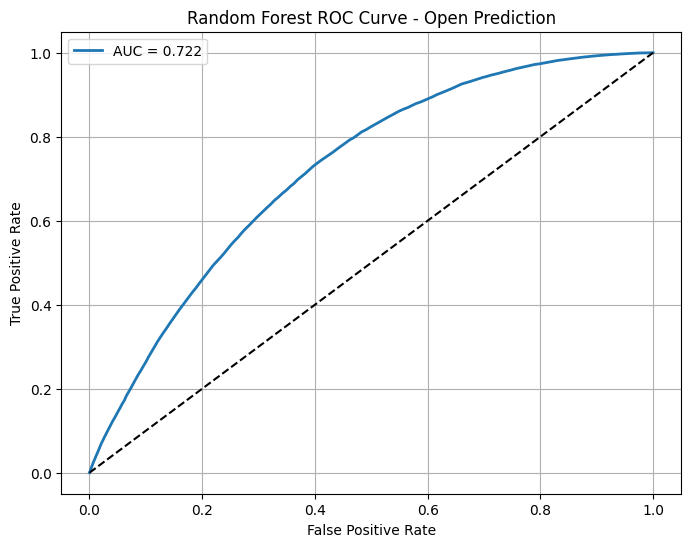

In [8]:
plot_roc(rf_model, X_test, y_test, title="Random Forest ROC Curve - Open Prediction")

In [9]:
def plot_lift(lift_table, title="Lift Chart"):
    df_plot = lift_table.copy()
    df_plot = df_plot.sort_index(ascending=False).reset_index()

    plt.figure(figsize=(10,6))
    plt.plot(df_plot.index, df_plot["lift"], marker='o')
    plt.title(title)
    plt.xlabel("Decile (0 = lowest, 9=highest)")
    plt.ylabel("Lift")
    plt.grid(True)
    plt.show()

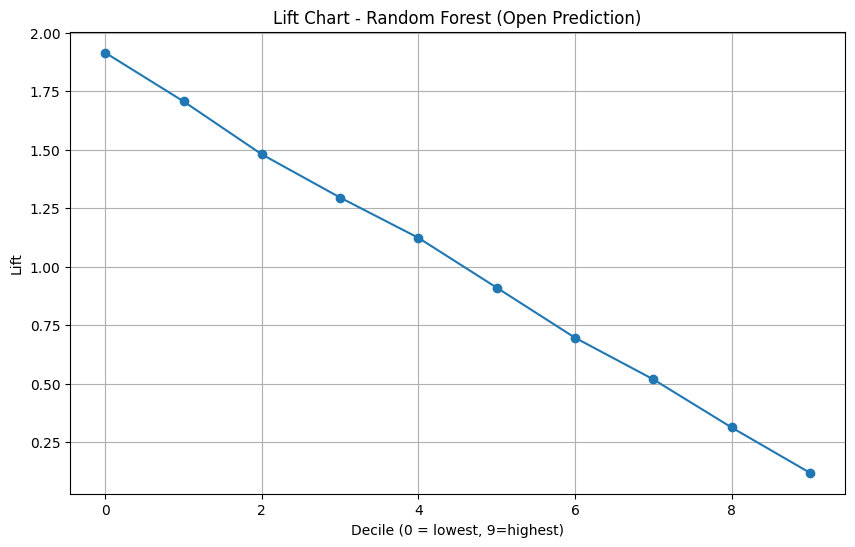

,total,positives,response_rate,cumulative_positives,lift
decile,,,,,
9,7982,3857,0.483212,3857,1.914944
8,7662,3300,0.430697,7157,1.706829
7,8053,3008,0.373525,10165,1.480261
6,7913,2587,0.326930,12752,1.295608
5,7998,2267,0.283446,15019,1.123281
4,7945,1825,0.229704,16844,0.910306
3,7975,1401,0.175674,18245,0.696187
2,8160,1067,0.130760,19312,0.518194
1,7901,623,0.078851,19935,0.312481


In [10]:
rf_lift = rf_metrics["lift"]
plot_lift(rf_lift, title="Lift Chart - Random Forest (Open Prediction)")
rf_lift

C:\Users\aakas\AppData\Local\Temp\ipykernel_20132\1046028669.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fi_df, x="importance", y="feature", palette="viridis")


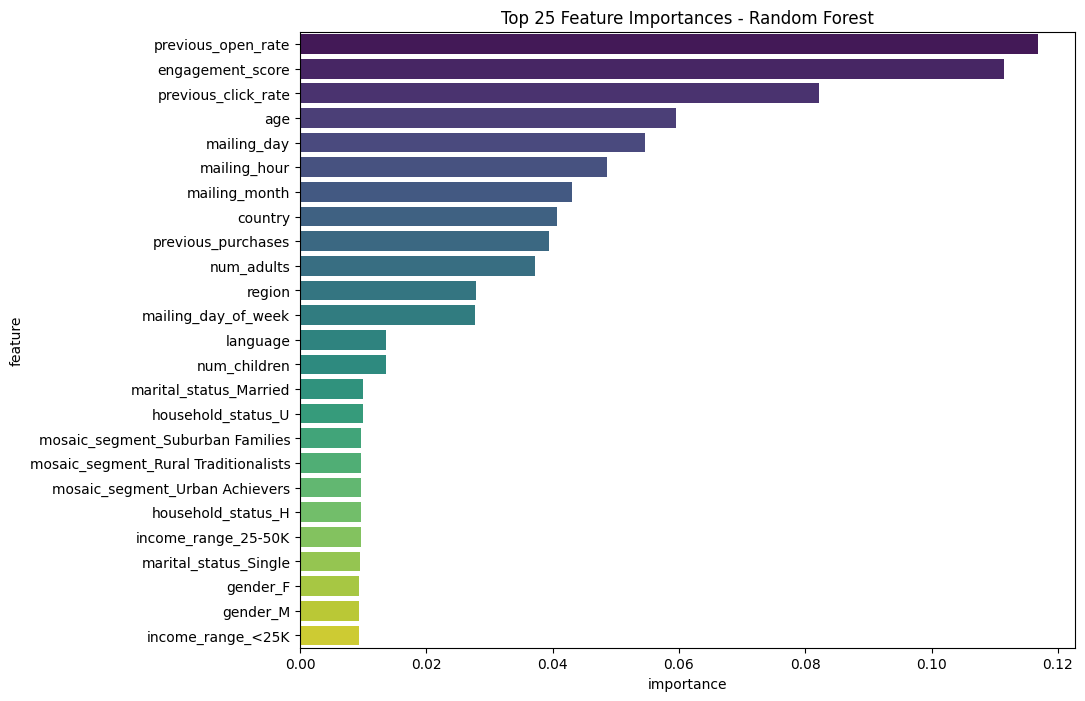

,feature,importance
3,previous_open_rate,0.116884
6,engagement_score,0.111415
4,previous_click_rate,0.082117
0,age,0.059524
10,mailing_day,0.054601
7,mailing_hour,0.048615
9,mailing_month,0.043042
51,country,0.040736
5,previous_purchases,0.039406
1,num_adults,0.037137


In [11]:
importances = rf_model.feature_importances_
fi_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False).head(25)

plt.figure(figsize=(10,8))
sns.barplot(data=fi_df, x="importance", y="feature", palette="viridis")
plt.title("Top 25 Feature Importances - Random Forest")
plt.show()

fi_df

In [12]:
import joblib

MODEL_DIR = PROJECT_ROOT / "models"
MODEL_DIR.mkdir(exist_ok=True)

joblib.dump(rf_model, MODEL_DIR / "rf_open_model.pkl")
joblib.dump(preprocessor, MODEL_DIR / "rf_preprocessor.pkl")

"Model and preprocessor saved successfully"

'Model and preprocessor saved successfully'

# Modeling summary

### Logistic regression
- Baseline performance
- Good for interpretability
- Useful as a sanity check

### Random Forest (Our primary model)
- Higher ROC-AUC
- Stronger lift in top deciles
- Excellent for marketing targeting

### Decile Lift Observations
- Top decile achieved ~1.94x lift
- Significant business value
- Ideal for top-tier targeting campaigns